In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
train = pd.read_csv('../data/train_xy.csv')

In [3]:
test = pd.read_csv('../data/test_all.csv')

In [4]:
train.head()

cust_id cust_group  y       x_1       x_2  x_3  x_4  x_5  x_6  x_7  ...    \
0   110000    group_3  0  0.354167  0.604988  -99  -99  -99  -99  -99  ...     
1   110001    group_3  0  0.125000  0.012058  -99  -99  -99  -99  -99  ...     
2   110002    group_3  0  0.333333  0.565979    0    0    0    0    0  ...     
3   110003    group_3  0  0.208333  0.316209    0    0    0    0    1  ...     
4   110004    group_3  0  0.208333  0.008061  -99  -99  -99  -99  -99  ...     

   x_148  x_149  x_150  x_151  x_152  x_153  x_154  x_155  x_156  x_157  
0      1      1      1      1      1      1      1      1      3    -99  
1      1      1      1      1      1      1      1      1      2      2  
2      1      1      2      1      1      1      1      1      2      2  
3      2      1      1      1      1      1      1      1      2      4  
4      1      1      1      1      1      1      1      1      2      1  

[5 rows x 160 columns]

In [5]:
train.shape

(15000, 160)

In [6]:
test.head()

cust_id cust_group       x_1       x_2  x_3  x_4  x_5  x_6  x_7  x_8  \
0        1    group_1  0.291667  0.555388  -99  -99  -99  -99  -99  -99   
1        2    group_3  0.270833  0.770302    0    0    0    0    1    1   
2        3    group_3  0.354167  0.440327    0    0    0    0    4    3   
3        4    group_1  0.208333  0.476509    0    0    0    0    1    1   
4        5    group_1  0.125000  0.955286    0    0    0    0    2    1   

   ...    x_148  x_149  x_150  x_151  x_152  x_153  x_154  x_155  x_156  x_157  
0  ...        1      1      1      1      1      1      2      2      2      3  
1  ...        1      1      1      1      1      1      2      2      1     10  
2  ...        1      1      1      1      1      1      1      1      3      3  
3  ...        1      1      1      1      1      1      1      1      1      4  
4  ...        1      1      1      1      1      1      1      1      1     10  

[5 rows x 159 columns]

In [7]:
x_train = train.drop(['cust_group','y','cust_id'],axis =1)

In [8]:
x_test = test.drop(['cust_group','cust_id'],axis=1)

In [9]:
x_train.shape

(15000, 157)

In [10]:
x_test.shape

(10000, 157)

In [11]:
x = pd.concat([x_train,x_test])
x.shape

(25000, 157)

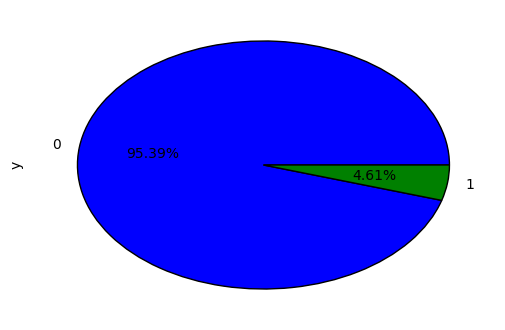

In [12]:
train['y'].value_counts().plot.pie(autopct = '%1.2f%%')

In [13]:
y_train = train['y']

In [14]:
for i in range(96,158):
    col = 'x'+'_'+str(i)
    dummies_df = pd.get_dummies(x[col]).rename(columns=lambda x: col + str(x))
    x = pd.concat([x, dummies_df], axis=1)

In [15]:
x.head()

x_1       x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10   ...     \
0  0.354167  0.604988  -99  -99  -99  -99  -99  -99  -99   -99   ...      
1  0.125000  0.012058  -99  -99  -99  -99  -99  -99  -99   -99   ...      
2  0.333333  0.565979    0    0    0    0    0    0    0     0   ...      
3  0.208333  0.316209    0    0    0    0    1    1    0     0   ...      
4  0.208333  0.008061  -99  -99  -99  -99  -99  -99    0     1   ...      

   x_1561  x_1562  x_1563  x_157-99  x_1571  x_1572  x_1573  x_1574  x_15710  \
0       0       0       1         1       0       0       0       0        0   
1       0       1       0         0       0       1       0       0        0   
2       0       1       0         0       0       1       0       0        0   
3       0       1       0         0       0       0       0       1        0   
4       0       1       0         0       1       0       0       0        0   

   x_15711  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 355 columns]

In [16]:
train_X = x[0:15000]
test_X = x[15000:25000]
print(train_X.shape)
print(test_X.shape)

(15000, 355)
(10000, 355)


In [17]:
cor = train_X
cor['y'] = y_train
cor.shape

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(15000, 356)

In [18]:
cor.head()

x_1       x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10 ...  x_1562  \
0  0.354167  0.604988  -99  -99  -99  -99  -99  -99  -99   -99 ...       0   
1  0.125000  0.012058  -99  -99  -99  -99  -99  -99  -99   -99 ...       1   
2  0.333333  0.565979    0    0    0    0    0    0    0     0 ...       1   
3  0.208333  0.316209    0    0    0    0    1    1    0     0 ...       1   
4  0.208333  0.008061  -99  -99  -99  -99  -99  -99    0     1 ...       1   

   x_1563  x_157-99  x_1571  x_1572  x_1573  x_1574  x_15710  x_15711  y  
0       1         1       0       0       0       0        0        0  0  
1       0         0       0       1       0       0        0        0  0  
2       0         0       0       1       0       0        0        0  0  
3       0         0       0       0       0       1        0        0  0  
4       0         0       1       0       0       0        0        0  0  

[5 rows x 356 columns]

In [19]:
corrr = cor.corr()

In [20]:
columns = corrr[corrr['y']>0.0].index.values
columns

array(['x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11',
       'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19',
       'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27',
       'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35',
       'x_36', 'x_37', 'x_38', 'x_48', 'x_49', 'x_58', 'x_61', 'x_62',
       'x_63', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76',
       'x_77', 'x_90', 'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_104',
       'x_105', 'x_106', 'x_109', 'x_121', 'x_122', 'x_124', 'x_136',
       'x_139', 'x_145', 'x_146', 'x_151', 'x_152', 'x_154', 'x_155',
       'x_961', 'x_971', 'x_981', 'x_992', 'x_1002', 'x_1012', 'x_102-99',
       'x_103-99', 'x_1040', 'x_1050', 'x_1061', 'x_107-99', 'x_108-99',
       'x_1091', 'x_111-99', 'x_113-99', 'x_114-99', 'x_115-99',
       'x_117-99', 'x_118-99', 'x_119-99', 'x_120-99', 'x_1210', 'x_1222',
       'x_123-99', 'x_1242', 'x_125-99', 'x_126-99', 'x_127-99',
      

In [21]:
train_feature = train_X[columns]
print(train_feature.shape)

train_feature = train_feature.drop(['y'],axis=1)

(15000, 133)


In [22]:
columns.shape

(133,)

In [23]:
column = columns[0:132]
column

array(['x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11',
       'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19',
       'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27',
       'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35',
       'x_36', 'x_37', 'x_38', 'x_48', 'x_49', 'x_58', 'x_61', 'x_62',
       'x_63', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76',
       'x_77', 'x_90', 'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_104',
       'x_105', 'x_106', 'x_109', 'x_121', 'x_122', 'x_124', 'x_136',
       'x_139', 'x_145', 'x_146', 'x_151', 'x_152', 'x_154', 'x_155',
       'x_961', 'x_971', 'x_981', 'x_992', 'x_1002', 'x_1012', 'x_102-99',
       'x_103-99', 'x_1040', 'x_1050', 'x_1061', 'x_107-99', 'x_108-99',
       'x_1091', 'x_111-99', 'x_113-99', 'x_114-99', 'x_115-99',
       'x_117-99', 'x_118-99', 'x_119-99', 'x_120-99', 'x_1210', 'x_1222',
       'x_123-99', 'x_1242', 'x_125-99', 'x_126-99', 'x_127-99',
      

In [24]:
test_feature = test_X[column]
print(test_feature.shape)

(10000, 132)


In [26]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
train_feature.shape

(15000, 132)

In [28]:
y_train.shape

(15000,)

In [29]:
X_train,X_val,y_train,y_val= train_test_split(train_feature,y_train,test_size=0.2,random_state=2)

In [30]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(12000, 132)
(3000, 132)
(12000,)
(3000,)


In [53]:
clf = GradientBoostingClassifier(n_estimators=125, learning_rate=0.05,max_depth=3).fit(X_train, y_train)

In [54]:
predictions = clf.predict_proba(X_val)
pre = predictions[:,1]
val_auc = metrics.roc_auc_score(y_val,pre)#验证集上的auc值
print(val_auc)

0.7706425988235326


In [55]:
preds = clf.predict_proba(test_feature)
pred = preds[:,1]
pred.shape

(10000,)

In [56]:
Submission = pd.DataFrame({'cust_id': test['cust_id'], 'pred_prob': pred})
Submission.to_csv('../result/Submission13.csv',index=False)